# Data Collection and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pass_id = test['PassengerId']

data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
data.shape

(8693, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Taking the count of null values in each attribute
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# Dropping the columns which has no effect
data = data.drop(['Cabin', 'Name', 'PassengerId'], axis=1)
test = test.drop(['Cabin', 'Name', 'PassengerId'], axis=1)
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
value_counts = data['Destination'].value_counts()
print(value_counts)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [9]:
value_counts = data['HomePlanet'].value_counts()
print(value_counts)

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [10]:
value_counts = data['CryoSleep'].value_counts()
print(value_counts)

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Transported'] = le.fit_transform(data['Transported'])
print(le.classes_)
    
data.head(5)

[False  True]


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


## Handling Categorical Data

Here label encoding should not be used since it can result in the model predicting that each value has relationships.
Therefore, one hot encoding can be used.

In [12]:
# Train test split
x = data.drop('Transported', axis=1)
y = data['Transported']
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [13]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8, random_state=12)
print(x.shape, x_train.shape, x_test.shape)

(8693, 10) (1738, 10) (6955, 10)


### Handling Categorical values in train data

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

# List the categorial features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop = 'first', handle_unknown = 'ignore', dtype = np.int64, sparse_output=False),
        cat_features
    )
)

# Encode the training features
transformed = transformer.fit_transform(x_train)
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())
transformed_df.index = x_train.index
x_train = pd.concat([x_train, transformed_df], axis = 1)
x_train.drop(cat_features, axis=1, inplace=True)
x_train.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0
593,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
6094,39.0,0.0,0.0,710.0,56.0,1.0,0,0,0,0,0,0,1,0,0,0
8065,35.0,1234.0,35.0,7.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0
5139,51.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
547,21.0,0.0,NaN,625.0,110.0,0.0,0,0,0,0,0,0,0,1,0,0
6507,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
5564,17.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
3165,23.0,2.0,6748.0,0.0,23.0,0.0,1,0,0,0,0,0,1,0,0,0
85,19.0,0.0,0.0,670.0,1.0,34.0,0,0,0,0,0,0,1,0,0,0


In [16]:
# Checking for null values
x_train.isnull().sum()

Age                                         38
RoomService                                 39
FoodCourt                                   43
ShoppingMall                                38
Spa                                         37
VRDeck                                      35
onehotencoder__HomePlanet_Europa             0
onehotencoder__HomePlanet_Mars               0
onehotencoder__HomePlanet_nan                0
onehotencoder__CryoSleep_True                0
onehotencoder__CryoSleep_nan                 0
onehotencoder__Destination_PSO J318.5-22     0
onehotencoder__Destination_TRAPPIST-1e       0
onehotencoder__Destination_nan               0
onehotencoder__VIP_True                      0
onehotencoder__VIP_nan                       0
dtype: int64

### Handling Categorical values in test data for model training

In [17]:
# List the categorial features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop = 'first', handle_unknown = 'ignore', dtype = np.int64, sparse_output=False),
        cat_features
    )
)

# Encode the training features
transformed = transformer.fit_transform(x_test)
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())
transformed_df.index = x_test.index
x_test = pd.concat([x_test, transformed_df], axis = 1)
x_test.drop(cat_features, axis=1, inplace=True)
x_test.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
2768,13.0,0.0,0.0,31.0,0.0,810.0,0,0,0,0,0,0,1,0,0,0
2106,22.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
2903,30.0,0.0,4.0,1604.0,678.0,1681.0,0,0,0,0,0,0,1,0,0,0
6780,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,0
3632,65.0,0.0,0.0,0.0,0.0,909.0,0,0,0,0,0,0,1,0,0,0
1131,25.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
27,21.0,980.0,2.0,69.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0
8269,29.0,230.0,0.0,1404.0,464.0,0.0,0,1,0,0,0,0,1,0,0,0
6849,39.0,197.0,0.0,2401.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0
2737,23.0,5.0,308.0,363.0,7.0,0.0,0,0,0,0,0,1,0,0,0,0


In [18]:
# Checking for null values
x_test.isnull().sum()

Age                                         141
RoomService                                 142
FoodCourt                                   140
ShoppingMall                                170
Spa                                         146
VRDeck                                      153
onehotencoder__HomePlanet_Europa              0
onehotencoder__HomePlanet_Mars                0
onehotencoder__HomePlanet_nan                 0
onehotencoder__CryoSleep_True                 0
onehotencoder__CryoSleep_nan                  0
onehotencoder__Destination_PSO J318.5-22      0
onehotencoder__Destination_TRAPPIST-1e        0
onehotencoder__Destination_nan                0
onehotencoder__VIP_True                       0
onehotencoder__VIP_nan                        0
dtype: int64

In [19]:
# List the categorial features
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop = 'first', handle_unknown = 'ignore', dtype = np.int64, sparse_output=False),
        cat_features
    )
)

# Encode the training features
transformed = transformer.fit_transform(test)
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())
transformed_df.index = test.index
test = pd.concat([test, transformed_df], axis = 1)
test.drop(cat_features, axis=1, inplace=True)
test.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,0,1,0,0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,0,1,0,0,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0
5,31.0,0.0,1615.0,263.0,113.0,60.0,0,0,0,0,0,0,1,0,0,0
6,21.0,0.0,NaN,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
7,20.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
8,23.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
9,24.0,0.0,639.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [20]:
x_train.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0
593,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
6094,39.0,0.0,0.0,710.0,56.0,1.0,0,0,0,0,0,0,1,0,0,0
8065,35.0,1234.0,35.0,7.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0
5139,51.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
547,21.0,0.0,NaN,625.0,110.0,0.0,0,0,0,0,0,0,0,1,0,0
6507,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
5564,17.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
3165,23.0,2.0,6748.0,0.0,23.0,0.0,1,0,0,0,0,0,1,0,0,0
85,19.0,0.0,0.0,670.0,1.0,34.0,0,0,0,0,0,0,1,0,0,0


In [21]:
x_train['RoomService'] = x_train['RoomService'].interpolate(method='linear')

In [22]:
x_train.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0
593,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
6094,39.0,0.0,0.0,710.0,56.0,1.0,0,0,0,0,0,0,1,0,0,0
8065,35.0,1234.0,35.0,7.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0
5139,51.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
547,21.0,0.0,NaN,625.0,110.0,0.0,0,0,0,0,0,0,0,1,0,0
6507,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
5564,17.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
3165,23.0,2.0,6748.0,0.0,23.0,0.0,1,0,0,0,0,0,1,0,0,0
85,19.0,0.0,0.0,670.0,1.0,34.0,0,0,0,0,0,0,1,0,0,0


In [23]:
cols = ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService', 'Age']
for col in cols:
    x_train[col] = x_train[col].interpolate(method='linear')
    
x_train.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0
593,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
6094,39.0,0.0,0.0,710.0,56.0,1.0,0,0,0,0,0,0,1,0,0,0
8065,35.0,1234.0,35.0,7.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0
5139,51.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
547,21.0,0.0,0.0,625.0,110.0,0.0,0,0,0,0,0,0,0,1,0,0
6507,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
5564,17.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
3165,23.0,2.0,6748.0,0.0,23.0,0.0,1,0,0,0,0,0,1,0,0,0
85,19.0,0.0,0.0,670.0,1.0,34.0,0,0,0,0,0,0,1,0,0,0


In [24]:
x_train.isnull().sum()

Age                                         0
RoomService                                 0
FoodCourt                                   0
ShoppingMall                                0
Spa                                         0
VRDeck                                      0
onehotencoder__HomePlanet_Europa            0
onehotencoder__HomePlanet_Mars              0
onehotencoder__HomePlanet_nan               0
onehotencoder__CryoSleep_True               0
onehotencoder__CryoSleep_nan                0
onehotencoder__Destination_PSO J318.5-22    0
onehotencoder__Destination_TRAPPIST-1e      0
onehotencoder__Destination_nan              0
onehotencoder__VIP_True                     0
onehotencoder__VIP_nan                      0
dtype: int64

In [25]:
cols = ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService', 'Age']
for col in cols:
    x_test[col] = x_test[col].interpolate(method='linear')
    
x_test.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
2768,13.0,0.0,0.0,31.0,0.0,810.0,0,0,0,0,0,0,1,0,0,0
2106,22.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
2903,30.0,0.0,4.0,1604.0,678.0,1681.0,0,0,0,0,0,0,1,0,0,0
6780,32.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,0
3632,65.0,0.0,0.0,0.0,0.0,909.0,0,0,0,0,0,0,1,0,0,0
1131,25.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
27,21.0,980.0,2.0,69.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0
8269,29.0,230.0,0.0,1404.0,464.0,0.0,0,1,0,0,0,0,1,0,0,0
6849,39.0,197.0,0.0,2401.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0
2737,23.0,5.0,308.0,363.0,7.0,0.0,0,0,0,0,0,1,0,0,0,0


In [26]:
cols = ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService', 'Age']
for col in cols:
    test[col] = test[col].interpolate(method='linear')
    
test.head(20)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,0,1,0,0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,0,1,0,0,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0
5,31.0,0.0,1615.0,263.0,113.0,60.0,0,0,0,0,0,0,1,0,0,0
6,21.0,0.0,807.5,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
7,20.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0
8,23.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
9,24.0,0.0,639.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0


In [27]:
x_test.isnull().sum()

Age                                         0
RoomService                                 0
FoodCourt                                   0
ShoppingMall                                0
Spa                                         0
VRDeck                                      0
onehotencoder__HomePlanet_Europa            0
onehotencoder__HomePlanet_Mars              0
onehotencoder__HomePlanet_nan               0
onehotencoder__CryoSleep_True               0
onehotencoder__CryoSleep_nan                0
onehotencoder__Destination_PSO J318.5-22    0
onehotencoder__Destination_TRAPPIST-1e      0
onehotencoder__Destination_nan              0
onehotencoder__VIP_True                     0
onehotencoder__VIP_nan                      0
dtype: int64

## Handling Imbalanced data

In [28]:
value_counts = y_train.value_counts()
print(value_counts)

1    873
0    865
Name: Transported, dtype: int64


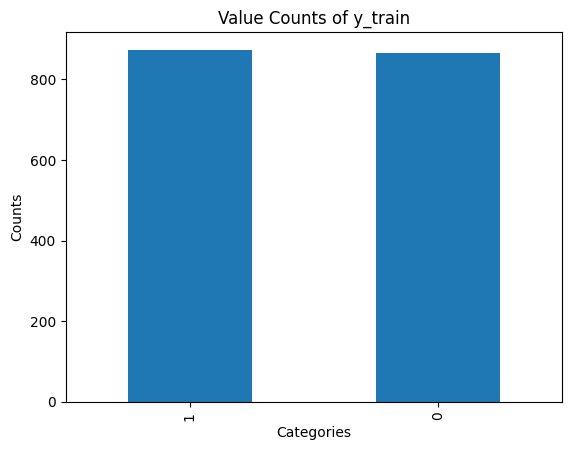

In [29]:
# Using matplotlib to plot graphs

import matplotlib.pyplot as plt

# Assuming 'value_counts' holds the count data from y_train.value_counts()
value_counts.plot(kind='bar')
plt.title('Value Counts of y_train')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

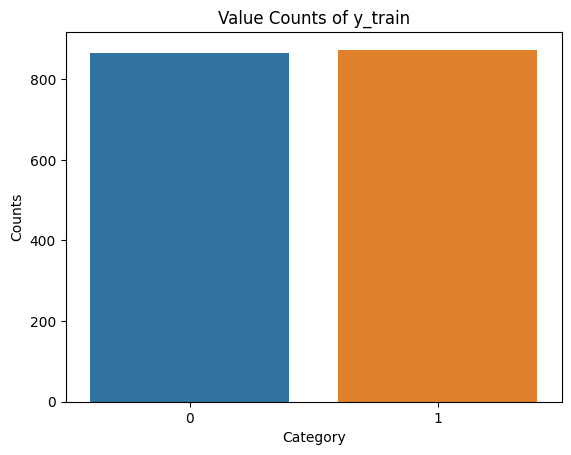

In [30]:
# Using seaborn to plot graphs

import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to convert the Series to a DataFrame, useful for Seaborn plotting
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Counts']  # Naming columns for better clarity

sns.barplot(x='Category', y='Counts', data=value_counts_df)
plt.title('Value Counts of y_train')
plt.show()


In [31]:
value_counts = y_test.value_counts()
print(value_counts)

1    3505
0    3450
Name: Transported, dtype: int64


## Standard Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
x_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,1,0,0,0
593,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0
6094,39.0,0.0,0.0,710.0,56.0,1.0,0,0,0,0,0,0,1,0,0,0
8065,35.0,1234.0,35.0,7.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0
5139,51.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0


In [34]:
num_features = ['VRDeck', 'FoodCourt', 'Age', 'RoomService', 'ShoppingMall', 'Spa']

x_train[num_features] = sc.fit_transform(x_train[num_features])
x_test[num_features] = sc.transform(x_test[num_features])

In [35]:
x_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
1013,-0.108933,-0.338136,-0.282294,-0.233748,-0.262741,-0.261643,0,1,0,1,0,0,1,0,0,0
593,-1.787172,-0.338136,-0.282294,-0.233748,-0.262741,-0.261643,0,0,0,1,0,0,0,0,0,0
6094,0.730186,-0.338136,-0.282294,0.689600,-0.216979,-0.260756,0,0,0,0,0,0,1,0,0,0
8065,0.450480,1.673534,-0.263508,-0.224645,-0.262741,-0.261643,0,1,0,0,0,0,1,0,1,0
5139,1.569306,-0.338136,-0.282294,-0.233748,-0.262741,-0.261643,1,0,0,1,0,0,1,0,0,0


In [36]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,onehotencoder__HomePlanet_Europa,onehotencoder__HomePlanet_Mars,onehotencoder__HomePlanet_nan,onehotencoder__CryoSleep_True,onehotencoder__CryoSleep_nan,onehotencoder__Destination_PSO J318.5-22,onehotencoder__Destination_TRAPPIST-1e,onehotencoder__Destination_nan,onehotencoder__VIP_True,onehotencoder__VIP_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,0,1,0,0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,0,1,0,0,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0


## ML Model Implementation & Evaluation

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [38]:
model1 = LR.fit(x_train, y_train)

In [39]:
predictions1 = model1.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions1)

0.7830337886412653

In [41]:
from sklearn.svm import SVC
LR = SVC(kernel='linear')

model2 = LR.fit(x_train, y_train)
predictions2 = model2.predict(x_test)

accuracy_score(y_test, predictions2)

0.7860531991373113

In [42]:
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier()

model3 = LR.fit(x_train, y_train)
predictions3 = model3.predict(x_test)

accuracy_score(y_test, predictions3)

0.7584471603163192

In [43]:
submission_preds = model2.predict(test)
print(submission_preds)

[0 0 1 ... 0 1 0]


In [44]:
original_labels = le.inverse_transform(submission_preds)
print(original_labels)

[False False  True ... False  True False]


In [45]:
df = pd.DataFrame({'PassengerId': pass_id.values,
                  "Transported": original_labels
                  })

In [46]:
df.to_csv('Submission.csv', index=False)